In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

# Functions

In [2]:
def format_columns(df):
    df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')
    df.date = pd.to_datetime(df.date)
    #df = df.set_index('date')
    return df

def round_values(df):
    for column in ['open', 'high', 'low', 'close', 'adj_close', 'volume']:
        df[column] = df[column].apply(lambda x: round(x, 3))
    return df

def adj_close_analysis(df, company):
    plt.figure(figsize=(9,3))
    plt.plot(df.date ,df.adj_close, c = 'red')
    plt.title('Adjustment Closing Value of ' + company)
    plt.ylabel('Stock Price')
    plt.show()

def volume_analysis(df, company):
    plt.figure(figsize=(9,3))
    plt.plot(df.date ,df.volume, c = 'blue')
    plt.title('Trading Volume of ' + company)
    plt.ylabel('Volume')
    plt.show()

# JP Morgan

In [3]:
df_JPM_2000 = pd.read_csv('../data/raw/JPM.csv')
df_JPM_2000 = format_columns(df_JPM_2000)
df_JPM_2000 = round_values(df_JPM_2000)

df_JPM_2024 = pd.read_csv('../data/raw/JPM2024.csv')
df_JPM_2024 = format_columns(df_JPM_2024)
df_JPM_2024 = round_values(df_JPM_2024)

In [4]:
df_JPM = pd.concat([df_JPM_2000, df_JPM_2024], axis=0)
df_JPM = df_JPM.drop_duplicates(subset='date', keep='first')
df_JPM = df_JPM[df_JPM.date >= '2019-11-01']
df_JPM = df_JPM.reset_index(drop=True)
df_JPM.head()

,date,open,high,low,close,adj_close,volume
0,2019-11-01,126.20,127.99,126.02,127.80,114.863,11682600
1,2019-11-04,129.08,129.42,128.56,128.82,115.780,9159900
2,2019-11-05,129.39,130.30,128.84,129.10,116.032,13747600
3,2019-11-06,128.69,129.84,128.58,129.30,116.211,11231100
4,2019-11-07,130.43,131.29,129.92,130.00,116.840,13528900


In [5]:
display(df_JPM.describe())

,date,open,high,low,close,adj_close,volume
count,1131,1131.000000,1131.000000,1131.000000,1131.000000,1131.000000,1.131000e+03
mean,2022-01-30 18:59:31.352785152,137.201742,138.593899,135.828196,137.232396,131.592447,1.363898e+07
min,2019-11-01 00:00:00,81.560000,83.750000,76.910000,79.030000,71.486000,3.220500e+06
25%,2020-12-15 12:00:00,119.945000,121.310000,118.320000,119.615000,114.257500,9.017150e+06
50%,2022-01-31 00:00:00,138.180000,139.230000,137.230000,138.290000,134.028000,1.171560e+07
75%,2023-03-16 12:00:00,154.390000,155.825000,153.030000,154.745000,147.782000,1.543745e+07
max,2024-05-01 00:00:00,199.990000,200.940000,198.570000,200.300000,199.138000,5.441880e+07
std,NaN,24.935809,24.879731,25.051992,25.005290,26.046082,7.174140e+06


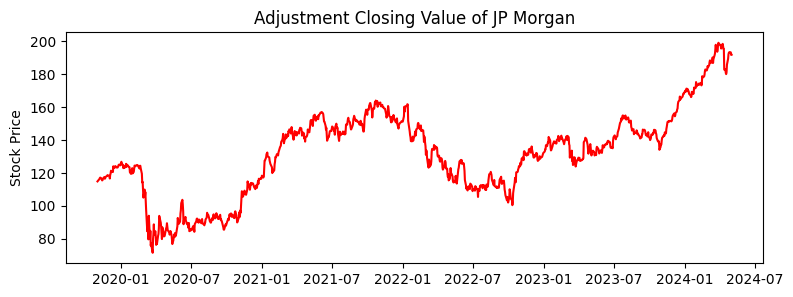

In [6]:
adj_close_analysis(df_JPM, 'JP Morgan')

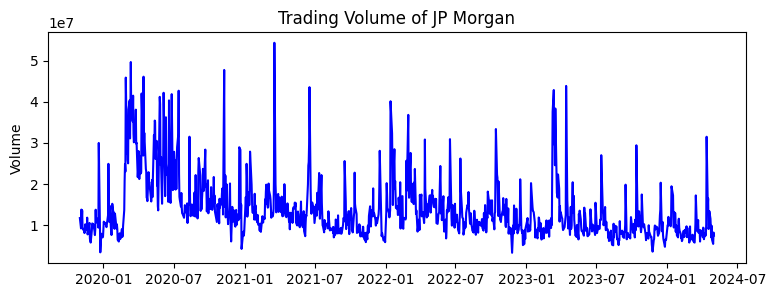

In [7]:
volume_analysis(df_JPM, 'JP Morgan')

In [8]:
df_JPM['daily_returns'] = df_JPM.adj_close.pct_change() * 100

monthly_returns = df_JPM.groupby(pd.Grouper(key='date', freq='ME'))['adj_close'].last().pct_change() * 100
df_JPM['monthly_returns'] = df_JPM['date'].map(monthly_returns)

annual_returns = df_JPM.groupby(pd.Grouper(key='date', freq='YE'))['adj_close'].last().pct_change() * 100
df_JPM['annual_returns'] = df_JPM['date'].map(annual_returns)

df_JPM['daily_returns'] = df_JPM['daily_returns'].bfill()
df_JPM['monthly_returns'] = df_JPM['monthly_returns'].bfill()
df_JPM['annual_returns'] = df_JPM['annual_returns'].bfill()

df_JPM['daily_range'] = df_JPM.high - df_JPM.low

df_JPM.head()

,date,open,high,low,close,adj_close,volume,daily_returns,monthly_returns,annual_returns,daily_range
0,2019-11-01,126.20,127.99,126.02,127.80,114.863,11682600,0.798342,5.798754,-5.535203,1.97
1,2019-11-04,129.08,129.42,128.56,128.82,115.780,9159900,0.798342,5.798754,-5.535203,0.86
2,2019-11-05,129.39,130.30,128.84,129.10,116.032,13747600,0.217654,5.798754,-5.535203,1.46
3,2019-11-06,128.69,129.84,128.58,129.30,116.211,11231100,0.154268,5.798754,-5.535203,1.26
4,2019-11-07,130.43,131.29,129.92,130.00,116.840,13528900,0.541257,5.798754,-5.535203,1.37


# Goldman Sachs

In [9]:
df_GS_2000 = pd.read_csv('../data/raw/GoldmanSachs.csv')
df_GS_2000 = format_columns(df_GS_2000)
df_GS_2000 = round_values(df_GS_2000)

df_GS_2024 = pd.read_csv('../data/raw/GoldmanSachs2024.csv')
df_GS_2024 = format_columns(df_GS_2024)
df_GS_2024 = round_values(df_GS_2024)

In [10]:
df_GS = pd.concat([df_GS_2000, df_GS_2024], axis=0)
df_GS = df_GS.drop_duplicates(subset='date', keep='first')
df_GS = df_GS[df_GS.date >= '2019-11-01']
df_GS = df_GS.reset_index(drop=True)
df_GS.head()

,date,open,high,low,close,adj_close,volume
0,2019-11-01,215.26,217.89,214.75,217.39,200.676,2112300
1,2019-11-04,219.70,220.69,218.57,219.87,202.966,2538100
2,2019-11-05,220.80,221.78,218.47,218.64,201.830,2525100
3,2019-11-06,218.01,219.07,216.55,218.42,201.627,1863000
4,2019-11-07,220.77,224.77,220.41,223.29,206.123,3748600


In [11]:
df_GS['daily_returns'] = df_GS.adj_close.pct_change() * 100

monthly_returns = df_JPM.groupby(pd.Grouper(key='date', freq='ME'))['adj_close'].last().pct_change() * 100
df_GS['monthly_returns'] = df_GS['date'].map(monthly_returns)

annual_returns = df_JPM.groupby(pd.Grouper(key='date', freq='YE'))['adj_close'].last().pct_change() * 100
df_GS['annual_returns'] = df_GS['date'].map(annual_returns)

df_GS['daily_returns'] = df_GS['daily_returns'].bfill()
df_GS['monthly_returns'] = df_GS['monthly_returns'].bfill()
df_GS['annual_returns'] = df_GS['annual_returns'].bfill()

df_GS['daily_range'] = df_GS.high - df_GS.low

df_GS.head()

,date,open,high,low,close,adj_close,volume,daily_returns,monthly_returns,annual_returns,daily_range
0,2019-11-01,215.26,217.89,214.75,217.39,200.676,2112300,1.141143,5.798754,-5.535203,3.14
1,2019-11-04,219.70,220.69,218.57,219.87,202.966,2538100,1.141143,5.798754,-5.535203,2.12
2,2019-11-05,220.80,221.78,218.47,218.64,201.830,2525100,-0.559700,5.798754,-5.535203,3.31
3,2019-11-06,218.01,219.07,216.55,218.42,201.627,1863000,-0.100580,5.798754,-5.535203,2.52
4,2019-11-07,220.77,224.77,220.41,223.29,206.123,3748600,2.229860,5.798754,-5.535203,4.36


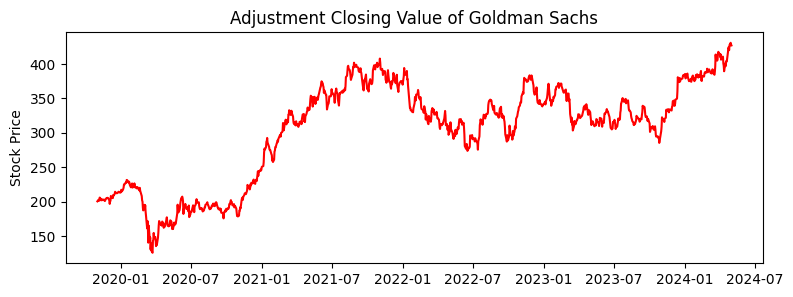

In [12]:
adj_close_analysis(df_GS, 'Goldman Sachs')

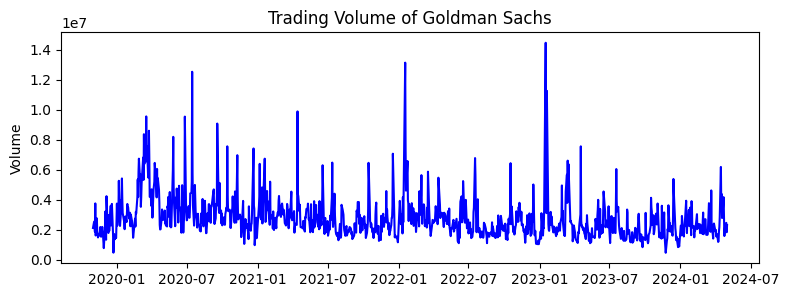

In [13]:
volume_analysis(df_GS, 'Goldman Sachs')

# Comparison

In [14]:
def analysis_df(df, company):
    
    summary = {}
    
    for column in ['open', 'high', 'low', 'close', 'adj_close', 'volume', 'daily_returns', 
                   'monthly_returns', 'annual_returns', 'daily_range']:
        column_mean = round(df[column].mean(), 3)
        column_std = round(df[column].std(), 3)
        summary[column] = [column_mean, column_std]
    
    df = pd.DataFrame(summary, index=['mean', 'std'])
    return df

In [20]:
analysis_JPM = analysis_df(df_JPM, 'JP Morgan')
analysis_JPM.to_csv('analysis_JPM.csv', index=False)
analysis_JPM

,open,high,low,close,adj_close,volume,daily_returns,monthly_returns,annual_returns,daily_range
mean,137.202,138.594,135.828,137.232,131.592,1.363898e+07,0.068,0.878,9.826,2.766
std,24.936,24.880,25.052,25.005,26.046,7.174140e+06,2.074,8.656,16.607,1.366


In [21]:
analysis_GS = analysis_df(df_GS, 'Goldman Sachs')
analysis_GS.to_csv('analysis_GS.csv', index=False)
analysis_GS

,open,high,low,close,adj_close,volume,daily_returns,monthly_returns,annual_returns,daily_range
mean,313.142,316.708,309.682,313.268,303.723,2766378.868,0.090,0.878,9.826,7.026
std,69.930,70.269,69.549,69.921,71.589,1392000.433,2.102,8.656,16.607,3.217
